In [68]:
import psycopg2
import pandas.io.sql as sqlio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # optional
plt.style.use('ggplot') # optional
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Connect to an existing database
conn = psycopg2.connect("dbname=playground user=postgres password=cirezicinama2109B")


In [3]:
# Open a cursor to perform database operations
cur = conn.cursor()

In [88]:
# Execute a command: this creates a new table
cur.execute("""
CREATE TABLE olympics (
    id SERIAL,
    name VARCHAR,
    sex VARCHAR,
    age VARCHAR,
    height VARCHAR,
    weight VARCHAR,
    team VARCHAR,
    NOC VARCHAR,
    games VARCHAR,
    year INT,
    season VARCHAR,
    city VARCHAR,
    sport VARCHAR,
    event VARCHAR,
    medal VARCHAR
)
""");

DuplicateTable: relation "olympics" already exists


In [89]:
# Create the other table
cur.execute("CREATE TABLE noc_regions (noc VARCHAR, region VARCHAR);")

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block


In [90]:
# Copy data from CSV into our data tables
sql_string = """
COPY {}
FROM {}
DELIMITER ',' 
CSV HEADER;
"""

In [91]:
# Modify these variables depending on local filepaths
fpath1 = "'F:/28thoctobre/olympic/athlete_events.csv'"
fpath2 = "'F:/28thoctobre/olympic/noc_regions.csv'"


In [92]:
fpath1

"'F:/28thoctobre/olympic/athlete_events.csv'"

In [93]:
fpath2

"'F:/28thoctobre/olympic/noc_regions.csv'"

In [94]:
cur.execute(sql_string.format('olympics',fpath1))
cur.execute(sql_string.format('noc_regions', fpath2))



InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block


In [95]:
# Make the changes to the database persistent
conn.commit()

# Close communication with the database
#cur.close()

In [4]:
sql = "SELECT * FROM olympics"
master_df = sqlio.read_sql_query(sql,conn)
master_df.head()

id                      name sex age height weight            team  noc  \
0   1                 A Dijiang   M  24    180     80           China  CHN   
1   2                  A Lamusi   M  23    170     60           China  CHN   
2   3       Gunnar Nielsen Aaby   M  24     NA     NA         Denmark  DEN   
3   4      Edgar Lindenau Aabye   M  34     NA     NA  Denmark/Sweden  DEN   
4   5  Christine Jacoba Aaftink   F  21    185     82     Netherlands  NED   

         games  year  season       city          sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              event medal  
0       Basketball Men's Basketball    NA  
1      Judo Men's Extra-Lightweight    NA  
2           Football Men's Football    NA  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres    NA

## How many teams are there?

In [5]:
cur.execute("SELECT COUNT(DISTINCT noc) FROM olympics")

In [6]:
cur.fetchall()

[(230,)]

In [7]:
sql = "SELECT COUNT(DISTINCT noc) FROM olympics"
master_dwf = sqlio.read_sql_query(sql,conn)
master_dwf

count
0    230

### How many sports are there?

In [8]:
cur.execute("SELECT COUNT(DISTINCT sport) FROM olympics")

In [9]:
cur.fetchone()

(66,)

### How many events are there?

In [10]:
cur.execute("SELECT COUNT(DISTINCT event) FROM olympics")

In [11]:
cur.fetchone()

(765,)

### Who are the top 5 youngest athletes to ever compete in the Games?

In [12]:
sql = " SELECT DISTINCT name, CAST(age AS INTEGER), sport, event, noc, games, city, medal FROM olympics\
        WHERE age <> 'NA'\
        ORDER BY age\
        LIMIT 5"
master_dwf = sqlio.read_sql_query(sql,conn)
master_dwf

name  age           sport  \
0               Dimitrios Loundras   10      Gymnastics   
1                   Beatrice Hutiu   11  Figure Skating   
2  Carlos Bienvenido Front Barrera   11          Rowing   
3                     Etsuko Inada   11  Figure Skating   
4                     Liana Vicens   11        Swimming   

                                      event  noc        games  \
0     Gymnastics Men's Parallel Bars, Teams  GRE  1896 Summer   
1            Figure Skating Women's Singles  ROU  1968 Winter   
2                 Rowing Men's Coxed Eights  ESP  1992 Summer   
3            Figure Skating Women's Singles  JPN  1936 Winter   
4  Swimming Women's 100 metres Breaststroke  PUR  1968 Summer   

                     city   medal  
0                  Athina  Bronze  
1                Grenoble      NA  
2               Barcelona      NA  
3  Garmisch-Partenkirchen      NA  
4             Mexico City      NA

### Who are the top 5 oldest athletes to ever compete in the Games?

In [13]:
sql = " SELECT DISTINCT name, CAST(age AS INTEGER), sport, event,noc, games, city, medal FROM olympics\
       WHERE age <> 'NA'\
       ORDER BY age DESC\
       LIMIT 5"
master_dwf1 = sqlio.read_sql_query(sql,conn)
master_dwf1

name  age             sport  \
0      John Quincy Adams Ward   97  Art Competitions   
1               Winslow Homer   96  Art Competitions   
2  Thomas Cowperthwait Eakins   88  Art Competitions   
3       George Denholm Armour   84  Art Competitions   
4                Louis Tauzin   81  Art Competitions   

                                            event  noc        games  \
0     Art Competitions Mixed Sculpturing, Statues  USA  1928 Summer   
1  Art Competitions Mixed Painting, Unknown Event  USA  1932 Summer   
2  Art Competitions Mixed Painting, Unknown Event  USA  1932 Summer   
3  Art Competitions Mixed Painting, Unknown Event  GBR  1948 Summer   
4              Art Competitions Mixed Sculpturing  FRA  1924 Summer   

          city medal  
0    Amsterdam    NA  
1  Los Angeles    NA  
2  Los Angeles    NA  
3       London    NA  
4        Paris    NA

1. Exclude “Art Competitions” as a sport of interest by adding a WHERE clause

In [14]:
sql = " SELECT DISTINCT name, CAST(age AS INTEGER), sport, noc, games, city FROM olympics\
        WHERE age <> 'NA' AND sport != 'Art Competitions'\
        ORDER BY age DESC\
        LIMIT 5"
master_dwf2 = sqlio.read_sql_query(sql,conn)
master_dwf2

name  age          sport  noc  \
0  Arthur von Pongracz de Szent-Mikls und vr   72  Equestrianism  AUT   
1                          Oscar Gomer Swahn   72       Shooting  SWE   
2                     Charles William Martin   71        Sailing  FRA   
3                            Hiroshi Hoketsu   71  Equestrianism  JPN   
4                        Thomas Foster Scott   71        Archery  USA   

         games       city  
0  1936 Summer     Berlin  
1  1920 Summer  Antwerpen  
2  1900 Summer      Paris  
3  2012 Summer     London  
4  1904 Summer  St. Louis

2. Use a subquery to specify that we want the result set to contain a sport that is still active as of 2014

In [15]:
sql = "SELECT DISTINCT name, CAST(age AS INTEGER), sport, noc, games, city FROM olympics\
       WHERE age <> 'NA' AND sport IN (SELECT DISTINCT sport FROM olympics WHERE year >= 2014)\
       ORDER BY age DESC\
       LIMIT 5"
master_dwf3 = sqlio.read_sql_query(sql,conn)
master_dwf3

name  age          sport  noc  \
0  Arthur von Pongracz de Szent-Mikls und vr   72  Equestrianism  AUT   
1                          Oscar Gomer Swahn   72       Shooting  SWE   
2                     Charles William Martin   71        Sailing  FRA   
3                            Hiroshi Hoketsu   71  Equestrianism  JPN   
4                        Thomas Foster Scott   71        Archery  USA   

         games       city  
0  1936 Summer     Berlin  
1  1920 Summer  Antwerpen  
2  1900 Summer      Paris  
3  2012 Summer     London  
4  1904 Summer  St. Louis

### Who are the top 5 heaviest athletes to ever compete in the Games?

In [16]:
sql = "SELECT DISTINCT name, CAST(weight AS DECIMAL), sport, event, noc, games, city, medal FROM olympics\
      WHERE weight <> 'NA'\
       ORDER BY weight DESC\
      LIMIT 5"
master_dwf4 = sqlio.read_sql_query(sql,conn)
master_dwf4

name  weight      sport  \
0              Ricardo Blas, Jr.   214.0       Judo   
1              Ricardo Blas, Jr.   214.0       Judo   
2              Aytami Ruano Vega   198.0       Judo   
3                  Marek Galiski   190.0  Wrestling   
4  Christopher J. "Chris" Taylor   182.0  Wrestling   

                                            event  noc        games     city  \
0                          Judo Men's Heavyweight  GUM  2008 Summer  Beijing   
1                          Judo Men's Heavyweight  GUM  2012 Summer   London   
2                          Judo Men's Heavyweight  ESP  2004 Summer   Athina   
3  Wrestling Men's Super-Heavyweight, Greco-Roman  POL  1980 Summer   Moskva   
4    Wrestling Men's Super-Heavyweight, Freestyle  USA  1972 Summer   Munich   

    medal  
0      NA  
1      NA  
2      NA  
3      NA  
4  Bronze

## Visualizing number of athletes per sport, per region, over time

In [17]:

sql = "SELECT year, COUNT(*) AS num_athletes FROM olympics\
      WHERE season = 'Summer'\
      GROUP BY year"
master_dwf5 = sqlio.read_sql_query(sql,conn)
master_dwf5

year  num_athletes
0   1896           380
1   1900          1936
2   1904          1301
3   1906          1733
4   1908          3101
5   1912          4040
6   1920          4292
7   1924          5233
8   1928          4992
9   1932          2969
10  1936          6506
11  1948          6405
12  1952          8270
13  1956          5127
14  1960          8119
15  1964          7702
16  1968          8588
17  1972         10304
18  1976          8641
19  1980          7191
20  1984          9454
21  1988         12037
22  1992         12977
23  1996         13780
24  2000         13821
25  2004         13443
26  2008         13602
27  2012         12920
28  2016         13688

In [18]:
!pip install plotly

In [19]:
import plotly
import plotly.express as px
fig = px.bar(master_dwf5, x='year', y='num_athletes',
         labels={'pop':'population per year'}, height=400)
fig.show()

No handles with labels found to put in legend.


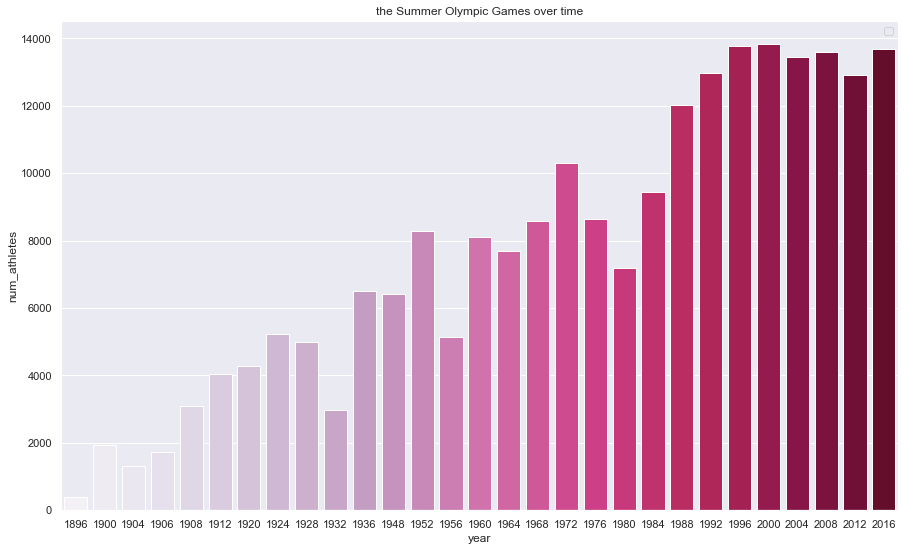

Index(['year', 'num_athletes'], dtype='object')


In [54]:
# create plot
# changing the figure size
plt.figure(figsize = (15, 9))
plt.title('the Summer Olympic Games over time')
sns.barplot(x = 'year', y = 'num_athletes', data = master_dwf5,
            palette = 'PuRd',ci=None 
            )
plt.legend()

plt.show()
print(master_dwf5.columns)

In [21]:

sql = "SELECT sport, COUNT(*) AS num_athletes FROM olympics\
       GROUP BY sport\
       HAVING COUNT(*) > 5000\
       ORDER BY COUNT(*) DESC"
master_dwf6 = sqlio.read_sql_query(sql,conn)
master_dwf6

sport  num_athletes
0              Athletics         38624
1             Gymnastics         26707
2               Swimming         23195
3               Shooting         11448
4                Cycling         10859
5                Fencing         10735
6                 Rowing         10595
7   Cross Country Skiing          9133
8          Alpine Skiing          8829
9              Wrestling          7154
10              Football          6745
11               Sailing          6586
12         Equestrianism          6344
13              Canoeing          6171
14                Boxing          6047
15         Speed Skating          5613
16            Ice Hockey          5516
17                Hockey          5417

No handles with labels found to put in legend.


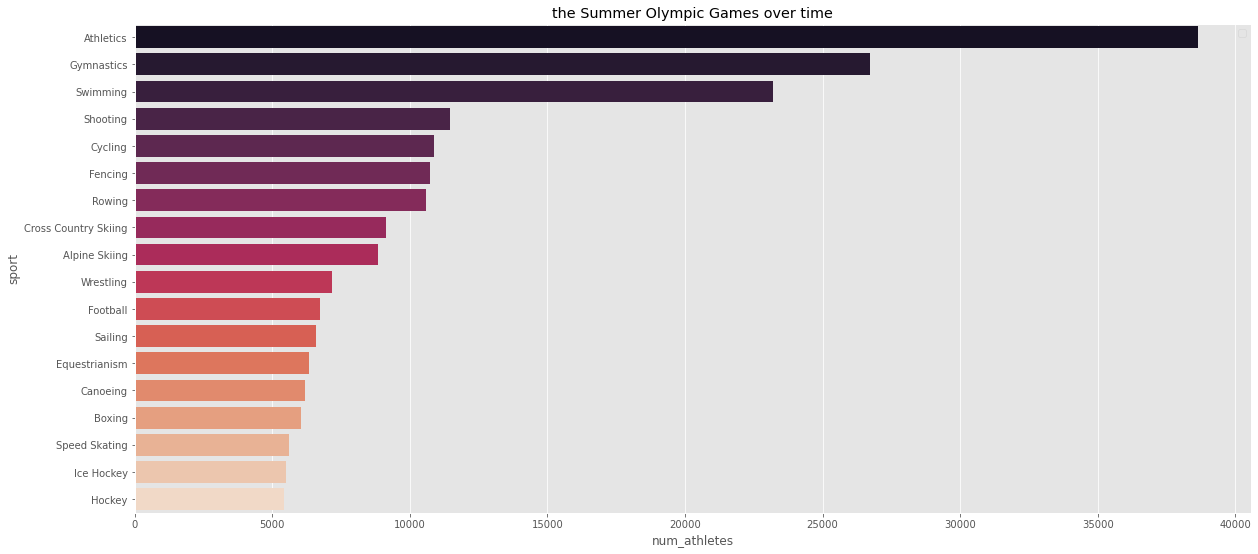

Index(['year', 'num_athletes'], dtype='object')


In [38]:
# create plot
# changing the figure size
plt.figure(figsize = (20, 9))
plt.title('the Summer Olympic Games over time')
sns.barplot(x = 'num_athletes', y = 'sport', data = master_dwf6, palette="rocket",
            ci=None 
            )
plt.legend()

plt.show()
print(master_dwf5.columns)

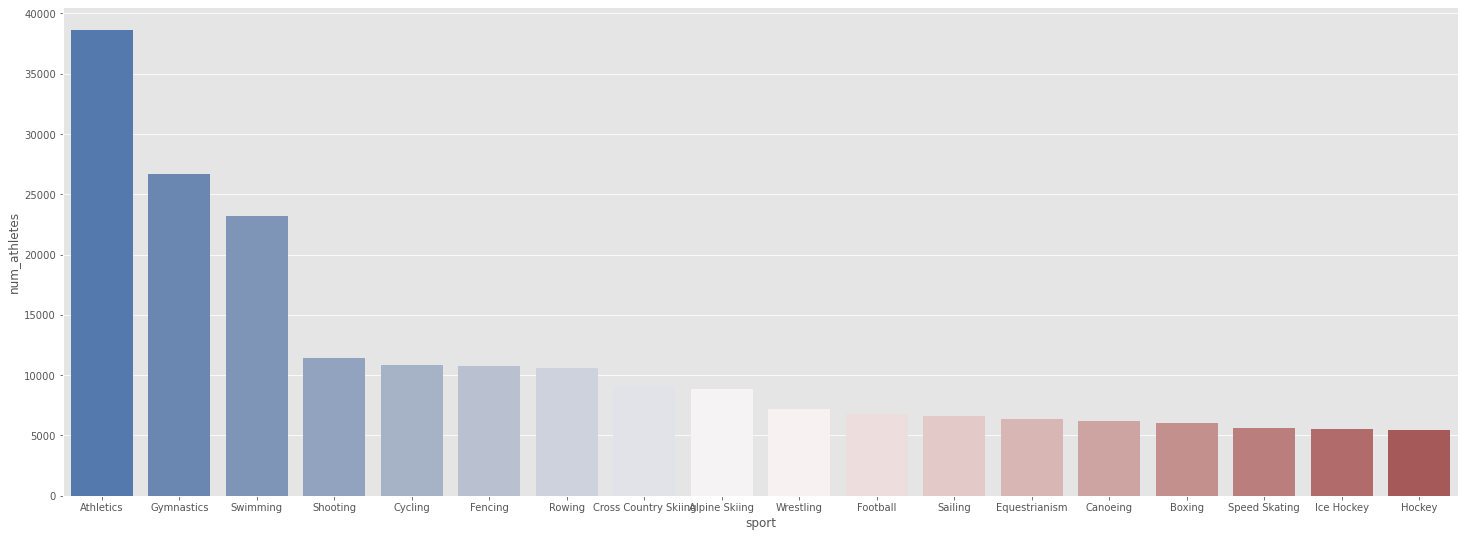

In [40]:
plt.figure(figsize = (25, 9))
sns.barplot(x = 'sport', y = 'num_athletes',palette="vlag", data = master_dwf6)
plt.show()

In [27]:

sql = "SELECT region, COUNT(*) AS num_athletes FROM olympics\
       LEFT JOIN noc_regions\
       ON noc_regions.noc = olympics.noc\
       GROUP BY region\
       HAVING COUNT(*) > 5000\
       ORDER BY COUNT(*) DESC"
master_dwf7 = sqlio.read_sql_query(sql,conn)
master_dwf7

region  num_athletes
0              USA         18853
1          Germany         15883
2           France         12758
3               UK         12256
4           Russia         11692
5            Italy         10715
6           Canada          9734
7            Japan          8444
8           Sweden          8339
9        Australia          7724
10         Hungary          6607
11  Czech Republic          6431
12          Poland          6207
13     Switzerland          6150
14     Netherlands          5839
15           China          5826
16         Finland          5467
17           Spain          5313
18         Austria          5141

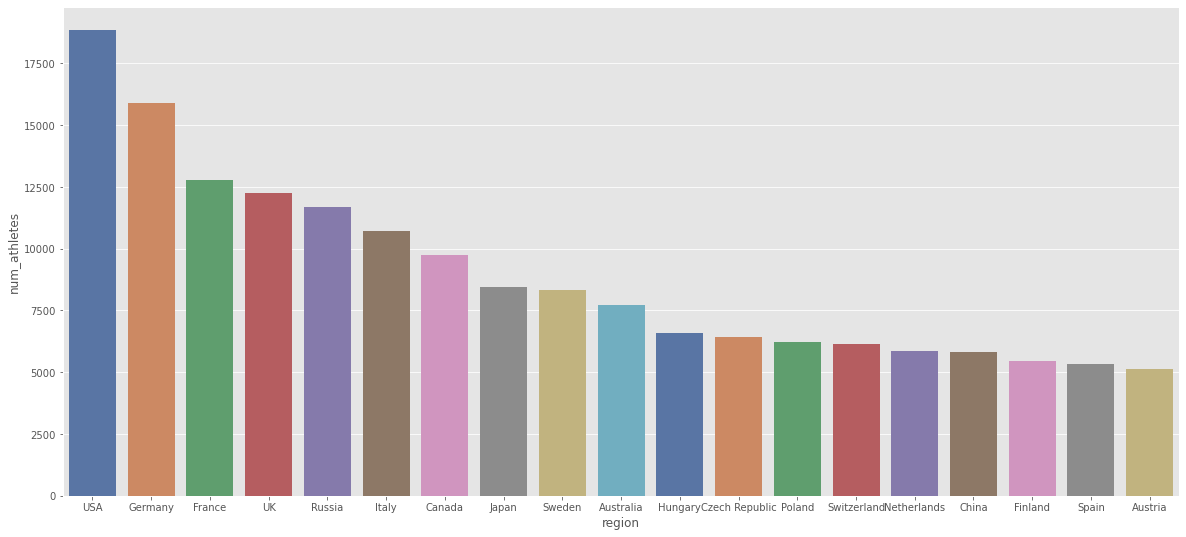

In [36]:
# changing the figure size
plt.figure(figsize = (20, 9))
sns.barplot(x = 'region', y = 'num_athletes',palette="deep", data = master_dwf7)
plt.show()

### What’s going on in the world of women’s basketball?

In [42]:

sql = "SELECT year, region AS gold FROM olympics\
       LEFT JOIN noc_regions\
       ON olympics.noc = noc_regions.noc\
       WHERE sport = 'Basketball' AND sex = 'F' AND medal = 'Gold'\
       GROUP BY year, region\
       ORDER BY year DESC"
master_dwf8 = sqlio.read_sql_query(sql,conn)
master_dwf8

year    gold
0   2016     USA
1   2012     USA
2   2008     USA
3   2004     USA
4   2000     USA
5   1996     USA
6   1992  Russia
7   1988     USA
8   1984     USA
9   1980  Russia
10  1976  Russia

In [43]:

sql = "SELECT G.year, G.gold, S.silver FROM\
       (SELECT year, region AS gold FROM olympics\
        LEFT JOIN noc_regions\
        ON olympics.noc = noc_regions.noc\
        WHERE sport = 'Basketball' and sex = 'F' and medal = 'Gold'\
        GROUP BY year, region) G,\
        (SELECT year, region AS silver FROM olympics\
        LEFT JOIN noc_regions\
        ON olympics.noc = noc_regions.noc\
        WHERE sport = 'Basketball' and sex = 'F' and medal = 'Silver'\
        GROUP BY year, region) S\
        WHERE G.year = S.year\
        ORDER BY year DESC"
master_dwf9 = sqlio.read_sql_query(sql,conn)
master_dwf9

year    gold       silver
0   2016     USA        Spain
1   2012     USA       France
2   2008     USA    Australia
3   2004     USA    Australia
4   2000     USA    Australia
5   1996     USA       Brazil
6   1992  Russia        China
7   1988     USA       Serbia
8   1984     USA  South Korea
9   1980  Russia     Bulgaria
10  1976  Russia          USA

### Who have been the key players for Team USA Women’s Basketball?

In [44]:
sql = "SELECT name, COUNT(*) FROM olympics\
      WHERE sport = 'Basketball' and sex = 'F' and medal = 'Gold' and noc = 'USA'\
      GROUP BY name\
      HAVING COUNT(*) >= 3\
      ORDER BY count DESC"
master_dwf10 = sqlio.read_sql_query(sql,conn)
master_dwf10

name  count
0  Lisa Deshawn Leslie (-Lockwood)      4
1        Suzanne Brigit "Sue" Bird      4
2             Diana Lurena Taurasi      4
3         Tamika Devonne Catchings      4
4                   Teresa Edwards      4
5            Sheryl Denice Swoopes      3
6      Katherine May "Katie" Smith      3
7         Seimone Delicia Augustus      3
8             Dawn Michelle Staley      3
9          Sylvia Shaqueria Fowles      3

### Analyzing athletic build (height and weight) by sport

In [48]:
sql = "SELECT sport, CAST(height AS INTEGER) FROM olympics\
       WHERE sport IN (\
       SELECT sport FROM olympics\
        GROUP BY sport\
        HAVING COUNT(*) > 3000)\
        AND height <> 'NA' AND season = 'Summer' AND year >= 2012 AND medal <> 'NA'\
        ORDER BY sport"
master_dwf11 = sqlio.read_sql_query(sql,conn)
master_dwf11

sport  height
0     Athletics     185
1     Athletics     167
2     Athletics     180
3     Athletics     168
4     Athletics     182
...         ...     ...
3382  Wrestling     163
3383  Wrestling     164
3384  Wrestling     165
3385  Wrestling     177
3386  Wrestling     152

[3387 rows x 2 columns]

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages

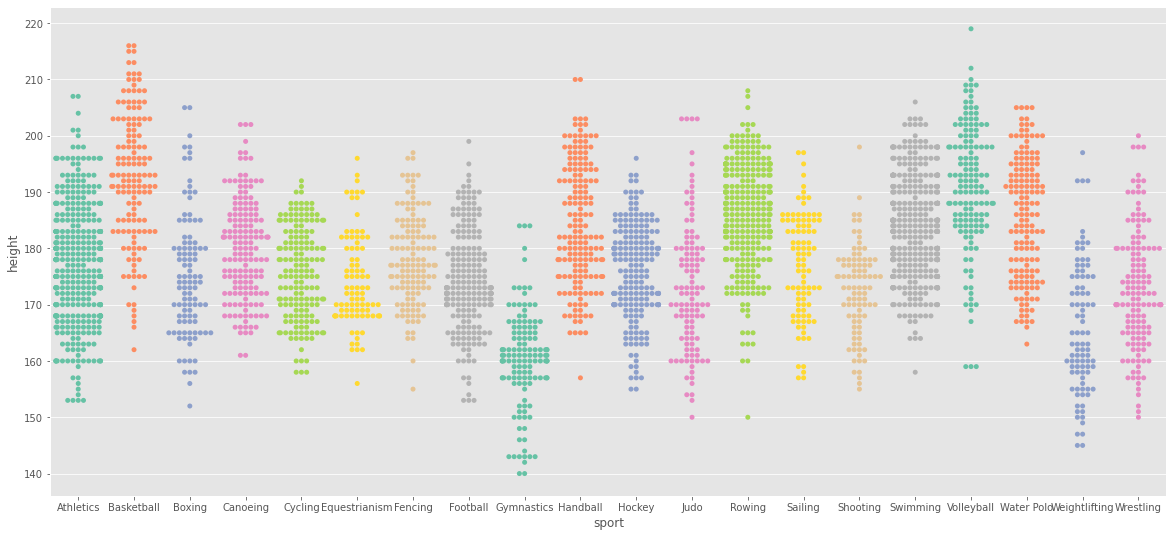

In [51]:
plt.figure(figsize = (20, 9))
ax = sns.swarmplot(x="sport", y="height", palette="Set2", dodge=True,data=master_dwf11)

In [54]:
sql = "SELECT sport, CAST(weight AS FLOAT) FROM olympics\
       WHERE sport IN (\
       SELECT sport FROM olympics\
        GROUP BY sport\
        HAVING COUNT(*) > 3000)\
        AND weight <> 'NA' AND season = 'Summer' AND year >= 2012 AND medal <> 'NA'\
        ORDER BY sport"
master_dwf12 = sqlio.read_sql_query(sql,conn)
master_dwf12

sport  weight
0     Athletics    61.0
1     Athletics    63.0
2     Athletics    68.0
3     Athletics    75.0
4     Athletics    45.0
...         ...     ...
3364  Wrestling    90.0
3365  Wrestling    76.0
3366  Wrestling    48.0
3367  Wrestling    60.0
3368  Wrestling    63.0

[3369 rows x 2 columns]

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packag

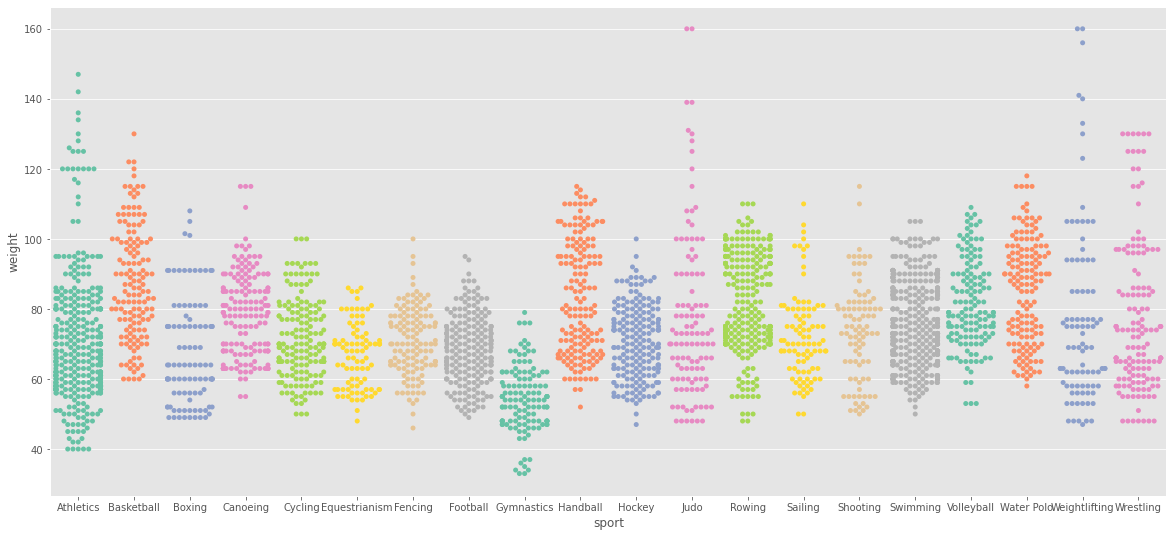

In [56]:
plt.figure(figsize = (20, 9))
ax = sns.swarmplot(x="sport", y="weight", palette="Set2", dodge=True,data=master_dwf12)

In [58]:
sql = "SELECT sport, CAST(age AS INTEGER) FROM olympics\
       WHERE sport IN (\
       SELECT sport FROM olympics\
        GROUP BY sport\
        HAVING COUNT(*) > 3000)\
        AND age <> 'NA' AND season = 'Summer' AND year >= 2012 AND medal <> 'NA'\
        ORDER BY sport"
master_dwf13 = sqlio.read_sql_query(sql,conn)
master_dwf13

sport  age
0     Athletics   31
1     Athletics   27
2     Athletics   25
3     Athletics   23
4     Athletics   19
...         ...  ...
3388  Wrestling   29
3389  Wrestling   27
3390  Wrestling   24
3391  Wrestling   20
3392  Wrestling   26

[3393 rows x 2 columns]

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mwamb\anaconda3\lib\site-packag

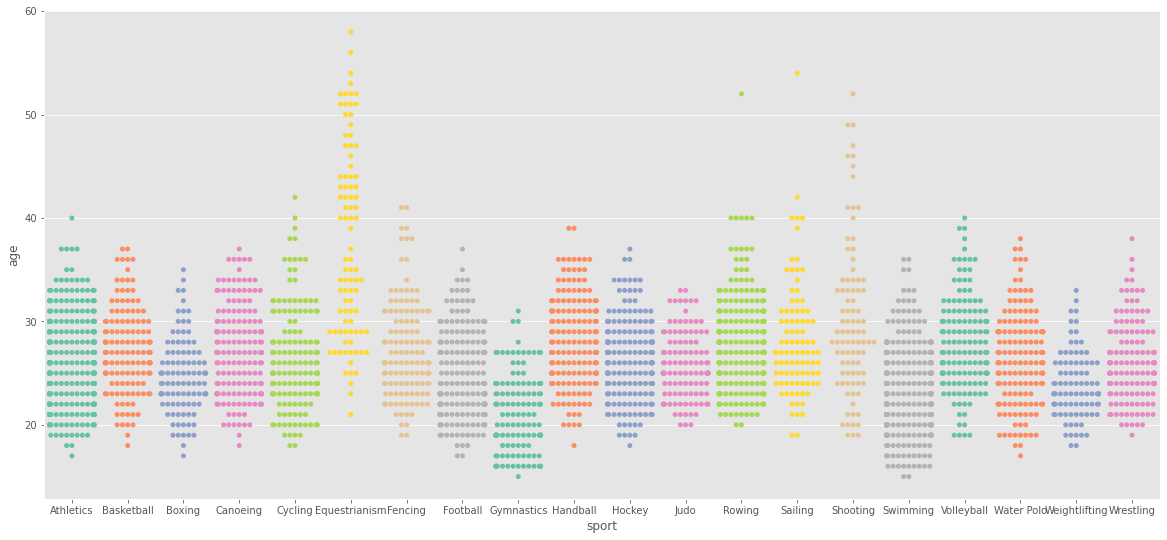

In [60]:
plt.figure(figsize = (20, 9))
ax = sns.swarmplot(x="sport", y="age", palette="Set2", dodge=True,data=master_dwf13)

In [61]:
sql = "SELECT CAST(age AS INTEGER), COUNT(*) AS num_medalists\
        FROM olympics\
        WHERE age <> 'NA' AND medal <> 'NA'\
        GROUP BY age"
master_dwf14 = sqlio.read_sql_query(sql,conn)
master_dwf14

age  num_medalists
0    10              1
1    11              1
2    12              6
3    13             16
4    14             75
..  ...            ...
56   68              2
57   69              2
58   71              2
59   72              2
60   73              1

[61 rows x 2 columns]

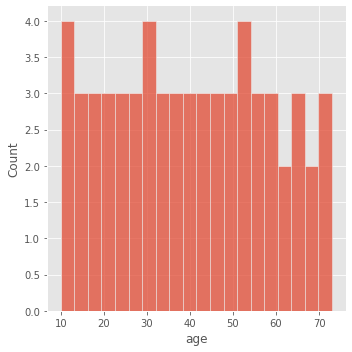

In [70]:

sns.displot(data=master_dwf14, x="age", bins=20)


### Who has collected the most hardware of all-time?

In [71]:
sql = "SELECT name, sex, noc, sport, SUM(CASE medal\
          WHEN 'Gold' THEN 3\
          WHEN 'Silver' THEN 2\
          WHEN 'Bronze' THEN 1\
          ELSE 0\
          END)\
        FROM olympics\
        GROUP BY\
        name, sex, noc, sport\
        ORDER BY sum DESC\
        LIMIT 10;"
master_dwf15 = sqlio.read_sql_query(sql,conn)
master_dwf15

name sex  noc       sport  sum
0                          Michael Fred Phelps, II   M  USA    Swimming   77
1               Larysa Semenivna Latynina (Diriy-)   F  URS  Gymnastics   41
2                     Nikolay Yefimovich Andrianov   M  URS  Gymnastics   34
3                             Paavo Johannes Nurmi   M  FIN   Athletics   33
4                              Ole Einar Bjrndalen   M  NOR    Biathlon   33
5                      Borys Anfiyanovych Shakhlin   M  URS  Gymnastics   31
6                                       Sawao Kato   M  JPN  Gymnastics   31
7  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)   F  USA    Swimming   31
8                      Raymond Clarence "Ray" Ewry   M  USA   Athletics   30
9                              Edoardo Mangiarotti   M  ITA     Fencing   30

### Which countries have demonstrated Olympic dominance in a sport?

In [72]:
sql = "SELECT region, sport, SUM(CASE medal\
          WHEN 'Gold' THEN 3\
          WHEN 'Silver' THEN 2\
          WHEN 'Bronze' THEN 1\
          ELSE 0\
          END)\
        FROM olympics\
        LEFT JOIN noc_regions\
        ON noc_regions.noc = olympics.noc\
        GROUP BY sport, region\
        ORDER BY sum DESC\
        LIMIT 8;"
master_dwf16 = sqlio.read_sql_query(sql,conn)
master_dwf16

region       sport   sum
0        USA    Swimming  2630
1        USA   Athletics  2481
2    Germany      Rowing  1107
3        USA  Basketball   927
4     Russia  Gymnastics   893
5     Canada  Ice Hockey   881
6        USA      Rowing   848
7  Australia    Swimming   823